<a href="https://colab.research.google.com/github/IgorKolesov/CIFAR10/blob/main/best_model_cifar10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Явно указываем необходимость загрузки второй версии tf

In [47]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Загрузка библиотек

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Загружаем датасет

In [49]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

Приводим данные к нужному типу

In [50]:
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


Посмотрим, как выглядят изображения

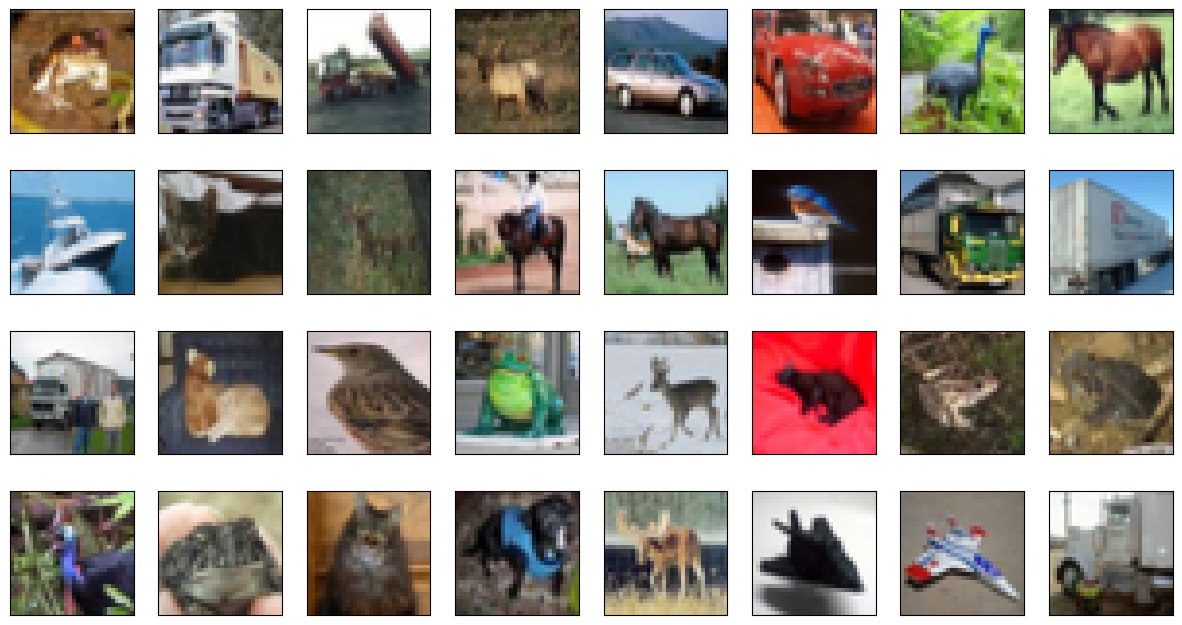

In [51]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(15,8))
for i in range(some_samples.shape[0]):
  ax = fig.add_subplot(4, 8, i+1)
  ax.imshow(some_samples[i, :, :, :])
  plt.xticks([]), plt.yticks([])

plt.show()

Посмотрим на распределение классов в тренировочном датасете

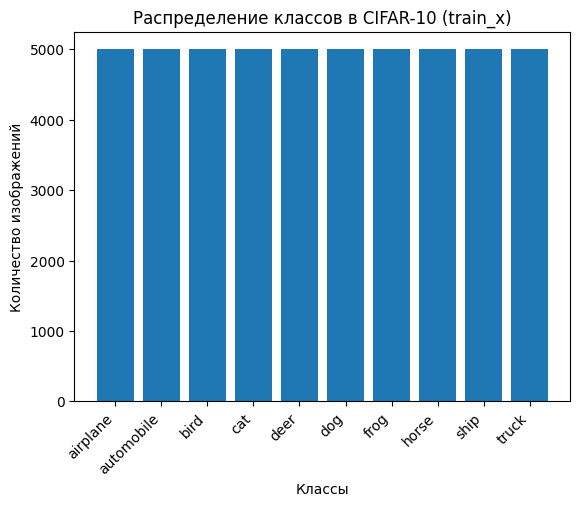

In [52]:
categories = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

class_counts = np.bincount(train_y.flatten())

plt.bar(categories.values(), class_counts)
plt.xlabel('Классы')
plt.ylabel('Количество изображений')
plt.title('Распределение классов в CIFAR-10 (train_x)')
plt.xticks(rotation=45, ha='right')
plt.show()

Попробуем изменять исходный датасет

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Определение параметров аугментации
datagen = ImageDataGenerator(
    rotation_range=20,      # Вращение изображения в диапазоне от -20 до 20 градусов
    width_shift_range=0.2,  # Сдвиг изображения по ширине
    height_shift_range=0.2, # Сдвиг изображения по высоте
    horizontal_flip=True,   # Отражение изображения по горизонтали
    zoom_range=0.2          # Масштабирование изображения
)

datagen.fit(train_x)

Создаем простую keras модель

In [62]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), (2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), (2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), (2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_69 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

Подготовка модели к обучению

In [63]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [64]:
batch_size = 32
epochs = 30

model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size)
# model.fit(datagen.flow(train_x, train_y, batch_size=batch_size), epochs=epochs)


Epoch 1/30
1563/1563 [==============================] - 22s 11ms/step - loss: 1.5528 - accuracy: 0.4753
Epoch 2/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9866 - accuracy: 0.6539
Epoch 3/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8342 - accuracy: 0.7079
Epoch 4/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7517 - accuracy: 0.7395
Epoch 5/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6792 - accuracy: 0.7677
Epoch 6/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6214 - accuracy: 0.7849
Epoch 7/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5773 - accuracy: 0.8009
Epoch 8/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5278 - accuracy: 0.8179
Epoch 9/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4955 - accuracy: 0.8292
Epoch 10/30
1563/1563 [==============================] - 18s 11m

Оценка качества модели

In [65]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 4ms/step - loss: 0.4684 - accuracy: 0.8654


[0.46842148900032043, 0.8654000163078308]

Сохраним обученную модель

In [74]:
 model.save("cifar10_best_model.keras")

Пример инференса

In [75]:
loaded_model = tf.keras.models.load_model("cifar10_best_model.keras")

check = test_x[0, ...]
prediction = loaded_model(check[None, ...])[0]
print(prediction)

tf.Tensor(
[1.1088583e-10 5.7489430e-10 3.3912801e-09 9.9996912e-01 2.7912447e-10
 3.0845378e-05 1.3375850e-09 4.4610622e-09 7.1192323e-09 1.3108077e-10], shape=(10,), dtype=float32)


Функция для отображения результата

In [76]:
def test_image(sample):
  prediction = loaded_model(sample[None, ...])[0]
  ans = np.argmax(prediction)

  fig = plt.figure(figsize=(12,4))

  ax = fig.add_subplot(1,2,1)
  ax.imshow(sample)
  plt.xticks([]), plt.yticks([])

  ax = fig.add_subplot(1,2,2)
  bars = ax.bar(np.arange(10), prediction, align='center')
  bars[ans].set_color('g')
  ax.set_xticks(np.arange(10))
  ax.set_xlim([-1, 10])
  ax.grid(True)

  plt.show()

  print(f'Prediction: {categories[ans]}')

Пример работы

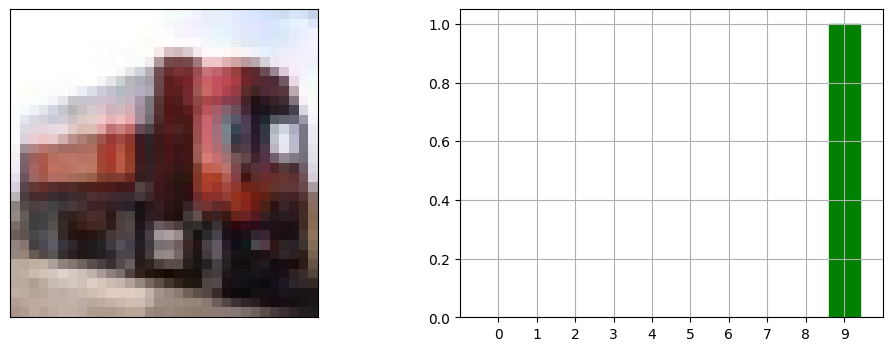

Prediction: truck


In [80]:
import random

idx = random.randint(0, test_x.shape[0])
test_image(test_x[idx, ...])

Тестируем произвольное изображение

In [78]:
import imageio
from skimage.transform import resize

def load_and_prepare_img(path_to_img):
  img = imageio.imread(path_to_img, pilmode='RGB')
  img = img.astype(np.float32) / 255
  img = resize(img, (32,32), order=3, mode='reflect', anti_aliasing=True)

  return img

<ipython-input-78-18d0475efb24>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path_to_img, pilmode='RGB')


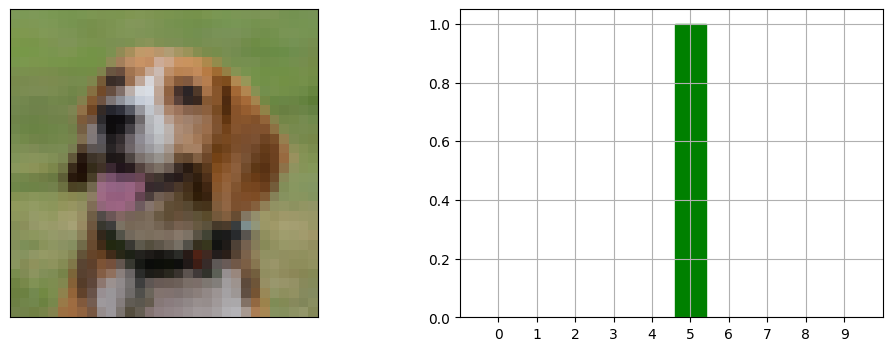

Prediction: dog


In [79]:
img = load_and_prepare_img('my_dog.jpg')
test_image(img)